# Analysis of Airfare Price Training Set

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# Compute z-scores to remove outliers
from scipy import stats
import numpy as np

# Label encoder
from sklearn.preprocessing import LabelEncoder

# Scikit-Learn
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score # Data split & cross validation
from sklearn.metrics import r2_score, mean_squared_error # R squared & MSE
from sklearn.preprocessing import StandardScaler # Standard scaler

# TensorFlow
import tensorflow as tf
from tensorflow.keras import Sequential # Sequential API
from tensorflow.keras.layers import Dense # Dense neural network
from tensorflow.keras.optimizers import Adam # Adam optimizer

## Why rcParams?
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.rc convenience routine.

**Link**: https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [2]:
# Load training dataset
train = pd.read_csv('Dataset_Modified.csv')
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,2019,16,50,21,35


## Convert Categorical Data into Numerical Data

In [3]:
# Drop price
data = train.drop(["Price"], axis=1)

In [4]:
# List columns
list(data.columns)

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Journey_Day',
 'Journey_Month',
 'Journey_Year',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

### Define Categorical and Numerical Data
Separates the different data types to work with specifically the categorical data. Once the categorical data is converted, the numerical data will be concatenated.

In [5]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  int64 
 6   Additional_Info  10462 non-null  object
 7   Journey_Day      10462 non-null  int64 
 8   Journey_Month    10462 non-null  int64 
 9   Journey_Year     10462 non-null  int64 
 10  Dep_Hour         10462 non-null  int64 
 11  Dep_Min          10462 non-null  int64 
 12  Arrival_Hour     10462 non-null  int64 
 13  Arrival_Min      10462 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [6]:
# Define only categorical data
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])

In [7]:
# Check data type of categorical dataset
train_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Additional_Info  10462 non-null  object
dtypes: object(5)
memory usage: 408.8+ KB


In [8]:
# Define only numerical data
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [9]:
# Check data type of numerical dataset
train_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Duration       10462 non-null  int64
 1   Total_Stops    10462 non-null  int64
 2   Journey_Day    10462 non-null  int64
 3   Journey_Month  10462 non-null  int64
 4   Journey_Year   10462 non-null  int64
 5   Dep_Hour       10462 non-null  int64
 6   Dep_Min        10462 non-null  int64
 7   Arrival_Hour   10462 non-null  int64
 8   Arrival_Min    10462 non-null  int64
dtypes: int64(9)
memory usage: 735.7 KB


**LabelEncoder( ) Summary**: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

**Warning**: Label encoding is a very simple approach in converting categorical data but it may introduce a new problem since it uses number sequencing. That problem is introducing relation/comparison between them. Will be introducing label encoding for the time being to see the results. However, further data modifying may need to happen.

**Reference**: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [10]:
# Label Encoding
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(le.fit_transform)

In [11]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,3
1,1,3,0,84,3
2,4,2,1,118,3
3,3,3,0,91,3
4,3,0,5,29,3


In [12]:
# Check uniqueness
train_categorical_data.nunique()

Airline              9
Source               5
Destination          6
Route              128
Additional_Info      5
dtype: int64

### Concatenate Categorical & Numerical Data

In [13]:
x = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train['Price']

In [14]:
# Check features
x.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,3,170,0,24,3,2019,22,20,1,10
1,1,3,0,84,3,445,2,1,5,2019,5,50,13,15
2,4,2,1,118,3,1140,2,9,6,2019,9,25,4,25
3,3,3,0,91,3,325,1,12,5,2019,18,5,23,30
4,3,0,5,29,3,285,1,1,3,2019,16,50,21,35


In [15]:
# Check target
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Linear Regression
Perform linear regression using Duration (refer to EDA_airfare_price_prediction.ipynb for reasoning).

Links:
- Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Walkthrough: https://medium.com/analytics-vidhya/linear-regression-in-python-with-scikit-learn-e1bb8a059cd2

### Remove Outliers

In [16]:
# Concatenate x and y so outliers can be removed together
data_lr = pd.concat([x, y], axis=1)

In [17]:
data_lr.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Price
0,3,0,5,18,3,170,0,24,3,2019,22,20,1,10,3897
1,1,3,0,84,3,445,2,1,5,2019,5,50,13,15,7662
2,4,2,1,118,3,1140,2,9,6,2019,9,25,4,25,13882
3,3,3,0,91,3,325,1,12,5,2019,18,5,23,30,6218
4,3,0,5,29,3,285,1,1,3,2019,16,50,21,35,13302


In [18]:
# Define dataframe with only needed variables
x_lr = data_lr[["Duration", "Price"]]

In [19]:
x_lr.head()

,Duration,Price
0,170,3897
1,445,7662
2,1140,13882
3,325,6218
4,285,13302


In [20]:
# Calculate z scores
z = np.abs(stats.zscore(x_lr[["Duration"]]))

In [21]:
z.head()

,Duration
0,0.918323
1,0.369065
2,1.019061
3,0.608741
4,0.688633


In [22]:
# Filter outliers outside a 99% confidence interval (z-score=3)
x_lr = x_lr[(z < 3).all(axis=1)]

In [23]:
# Check dataframe shape
x_lr.shape

(10401, 2)

In [24]:
# Compare original dataframe shape (61 outliers identified)
train.shape

(10462, 15)

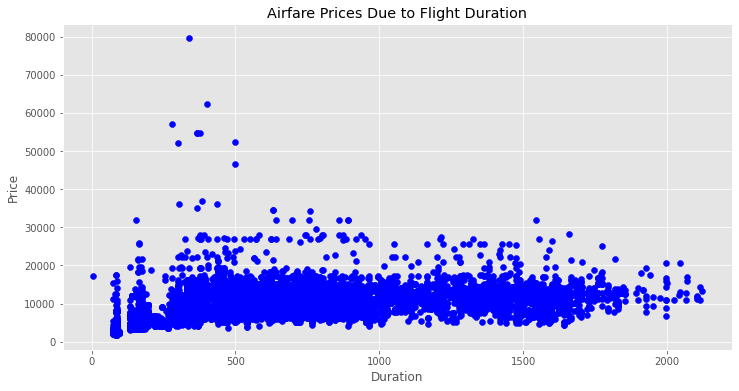

In [25]:
plt.scatter(x=x_lr["Duration"], y=x_lr["Price"], color='blue')
plt.title('Airfare Prices Due to Flight Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

The variables need to be reshaped for linear regression to be used.

Link: https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead

In [26]:
# Define variables - Need to convert from 2D array to 1D array
X = x_lr.iloc[:, 0].values.reshape(-1, 1)
y = x_lr.iloc[:, 1].values.reshape(-1, 1)

In [27]:
# Split data - 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Build linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [29]:
# Cross validation traing scores
cross_val_score(lr, X, y)

array([0.25892698, 0.25844864, 0.25987264, 0.25009363, 0.24585734])

In [30]:
# Intercept
lr.intercept_

array([6019.61642498])

In [31]:
# Coefficient
lr.coef_

array([[4.80663553]])

In [32]:
# Predicted prices
y_pred = lr.predict(X_test)

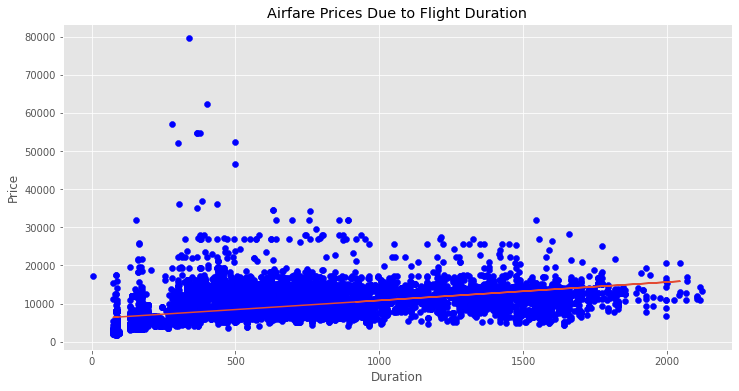

In [33]:
plt.scatter(x=x_lr["Duration"], y=x_lr["Price"], color='blue')
plt.plot(X_test, y_pred) # Best fit line
plt.title('Airfare Prices Due to Flight Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [34]:
# R squared evaluation
r2_score(y_test, y_pred)

0.2271312496166018

In [35]:
# Test RMSE evaluation
mean_squared_error(y_test, y_pred, squared=False)

4304.309670821705

## Neural Network (TensorFlow)
Applications used for the best NN model:
- **StandardScaler**: Scales all values between min and max so that they fall within a range from min to max. MinMaxScaler wasn't applied since its used more for when the upper and lower boundaries are well known from domain knowledge. It scales the minimum and maximum values to be 0 and 1 respectively.
- **Input Neurons**: 1 - For Departure Feature
- **Hidden Layers**: 3 Layers
- **Optimizer**: Adam optimizer
- **Neurons per Hidden Layer**: 256, 256, 128
- **Output Neurons**: 1 - For Price
- **Hidden Activation**: Rectified Linear Unit (ReLU)
- **Loss Function**: MSE - Transforming to RMSE

Reference page for NN model: https://towardsdatascience.com/regression-modelling-with-tensorflow-made-easy-train-your-first-model-in-10-minutes-497d829c7338

In [36]:
# Create scale
scaler = StandardScaler()

In [37]:
# Fit & transform feature
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[ 0.23528994],
       [-0.92685176],
       [ 0.25585882],
       ...,
       [-0.91656732],
       [ 0.26614325],
       [ 0.08102334]])

In [39]:
# Random seed
tf.random.set_seed(42)

# Build NN model
model = Sequential([
    Dense(256, activation = "relu"),
    Dense(256, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1)
])

2023-04-04 19:07:12.837163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
# Define RMSE
rmse = tf.keras.metrics.RootMeanSquaredError()

In [41]:
# Compile NN model
model.compile(
    loss = "mean_squared_error",
    optimizer = Adam(),
    metrics = [rmse] # Display RMSE for the metrics
)

Convert data y_train data type from int64 to float64. X_train has a data type of float64 which would lead to a type error when fitting the model

In [42]:
# Convert data y_train data type
y_train = y_train.astype(np.float64)

In [43]:
# Fit model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 50820144.0000 - root_mean_squared_error: 7128.8247
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 15350324.0000 - root_mean_squared_error: 3917.9490
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 15293070.0000 - root_mean_squared_error: 3910.6355
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 15324354.0000 - root_mean_squared_error: 3914.6333
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 15313411.0000 - root_mean_squared_error: 3913.2354
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 15328602.0000 - root_mean_squared_error: 3915.1758
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 15326127.0000 - root_mean_squared_error: 3914.8599
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 15290150.0000 - root_mean_squared_error: 39

260/260 [==============================] - 1s 3ms/step - loss: 12068665.0000 - root_mean_squared_error: 3473.9985
Epoch 66/100
260/260 [==============================] - 1s 3ms/step - loss: 12081735.0000 - root_mean_squared_error: 3475.8789
Epoch 67/100
260/260 [==============================] - 1s 3ms/step - loss: 12016147.0000 - root_mean_squared_error: 3466.4314
Epoch 68/100
260/260 [==============================] - 1s 3ms/step - loss: 12078394.0000 - root_mean_squared_error: 3475.3984
Epoch 69/100
260/260 [==============================] - 1s 3ms/step - loss: 12018334.0000 - root_mean_squared_error: 3466.7468
Epoch 70/100
260/260 [==============================] - 1s 3ms/step - loss: 12054497.0000 - root_mean_squared_error: 3471.9587
Epoch 71/100
260/260 [==============================] - 1s 3ms/step - loss: 12087817.0000 - root_mean_squared_error: 3476.7539
Epoch 72/100
260/260 [==============================] - 1s 3ms/step - loss: 12047733.0000 - root_mean_squared_error: 3470.98

In [44]:
y_pred = model.predict(X_test)

66/66 [==============================] - 0s 2ms/step


In [45]:
# Convert to 1D array
y_pred = np.ravel(y_pred)

In [46]:
# Test RMSE evaluation
mean_squared_error(y_test, y_pred, squared=False)

3867.2987400959964

### Results
- **For epoch=20**: Linear regression model (RMSE = 4304) has a little bit better performance than building a neural network (RMSE = 4319). This may be due to the model not reaching the optimal loss (in this case lowest MSE).
- **For epoch=100**: The neural network model (RMSE = 3867) has a better performance than the linear regression model. Optimal loss was reached around epoch 74 before bouncing at minimum MSE.
- **For optimizer="sgd"**: Loss and RMSE values in compiling the model shows "nan" values. This may be due to gradient explosion.